<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Renatta Garcia Sanchez, Juan Enrique Aguirre López

**Fecha:**  15 de octubre del 2020.

**Expediente** : 703275 ,722664 
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Liga repositorio:** https://github.com/renattaGS/Tareas_simproc_aguirre_garcia

# Tarea 4: Clase 13

### Problema 1
>1.Suponer que $T$ distribuye beta donde la media es $\mu_p$ y varianza $\sigma_p^2$ y responder cual es la probabilidad $P(T\leq d)$.
    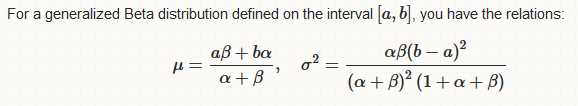

> **Ayuda**: - Aprender a utlizar el solucionador de ecuaciones no lineales https://stackoverflow.com/questions/19843116/passing-arguments-to-fsolve
- Leer el help de la función beta del paquete estadístico para aprender a graficar funciones beta en un intervalo diferente a 0 y 1.



## Solución Juan Enrique 

## Solución Renatta 

### Problema 2
>2.Suponer que $T$ distribuye triangular donde el valor mas probable es $\mu_p$ el valor pesimista es $p=49$ y el valor optimista es $o=40$ y responder cual es la probabilidad $P(T\leq d)$. Nuevamente aprender a graficar una función triangular en un intervalro [a,b], usando el help.


## Solución Juan Enrique 

## Solución Renatta 